In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import unicodedata
import re
nltk.download('all')

In [2]:
data_path = "/content/drive/MyDrive/Covid 19 India/final with target.csv"
data = pd.read_csv(data_path)
data = data.drop([33483, 62824])
data = data.reset_index().drop(['index'], axis = 1)
data

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,meditation and mindfulness tips for coping wit...,0.125000,"pune, india",mar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,contribute to india fights corona gandhinagar...,0.000000,"gandhinagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"sir, please send a team immediately to sa...",0.000000,"bidhan nagar, india",mar,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.033333,"maharashtra, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,mata di doston ise #corona ke tarah faila do ...,0.600000,"bokaro steel city, india",mar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145548,wow good to see these kids interest in onli...,0.350000,lb nagar,sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145549,"83,812 new cases and 1054 deaths in last 24 ...",0.068182,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145550,unlocking the #lockdown - women’s rights &amp;...,-0.175000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145551,astrazeneca covid-19 vaccine trial in us on ho...,0.000000,"new delhi, india",sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Bigrams, Trigrams and Tweets across months**

In [3]:
from nltk.corpus import stopwords

def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

words = clean(''.join(str(data['tweet'].tolist())))
words[:20]

['meditation',
 'mindfulness',
 'tip',
 'coping',
 'corona',
 'virus',
 'pandemicas',
 'people',
 'become',
 'anxious',
 'sel',
 'contribute',
 'india',
 'fight',
 'corona',
 'gandhinagar',
 'gujarat',
 'sir',
 'please',
 'send']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

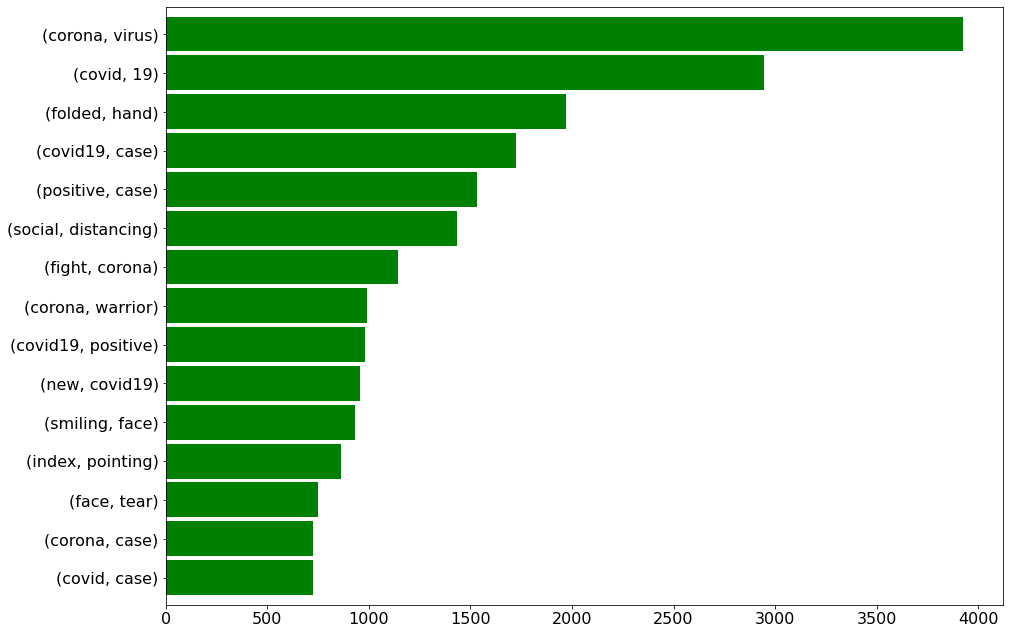

In [4]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

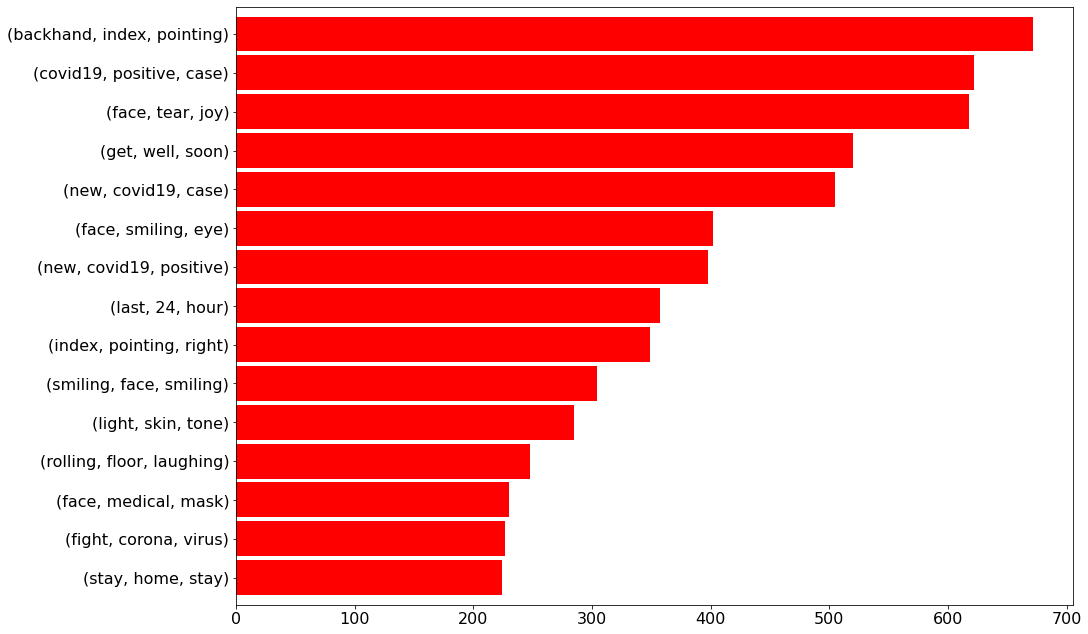

In [5]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [6]:
print(data.iloc[145551])
print(data['tweet'].iloc[145551])

tweet              astrazeneca covid-19 vaccine trial in us on ho...
sentiment_score                                                    0
place                                               new delhi, india
month                                                            sep
Optimistic                                                         0
Thankful                                                           0
Empathetic                                                         0
Pessimistic                                                        0
Anxious                                                            0
Sad                                                                0
Annoyed                                                            0
Denial                                                             0
Official report                                                    1
Surprise                                                           1
Joking                            

In [7]:
data.iloc[:, 4:] = data.iloc[:, 4:].astype(int)

In [8]:
data['month'].value_counts()

jul    31745
aug    25784
may    24701
jun    22931
mar    15392
apr    14489
sep    10511
Name: month, dtype: int64

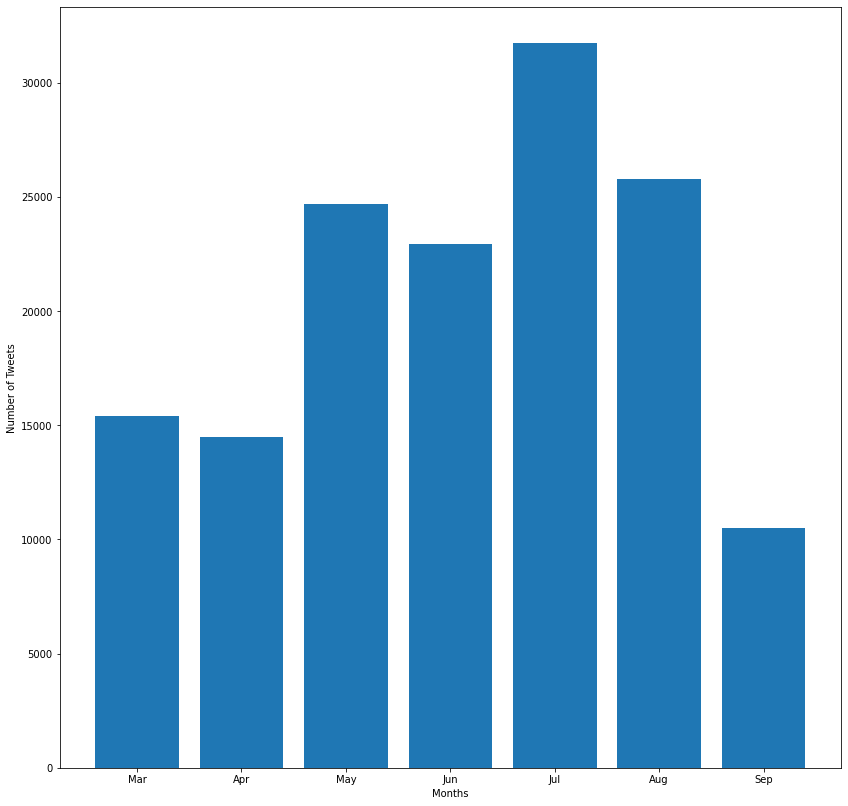

In [9]:
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sep"]
tweets = [15392, 14489, 24701, 22931, 31745, 25784, 10511]

plt.figure(figsize = (14, 14))
plt.bar(months, tweets)
plt.xlabel('Months')
plt.ylabel('Number of Tweets')
plt.show()

In [21]:
data = data.drop(['Denial'], axis = 1)
data.columns

Index(['tweet', 'sentiment_score', 'place', 'month', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed',
       'Official report', 'Surprise', 'Joking'],
      dtype='object')

**Heat maps**

In [22]:
emotions = list(data.columns[4:])
only_emotes = data[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
145548,0,0,0,0,0,0,0,0,0,1
145549,0,0,0,0,0,0,0,1,0,0
145550,0,0,0,0,0,0,0,0,0,1
145551,0,0,0,0,0,0,0,1,1,0


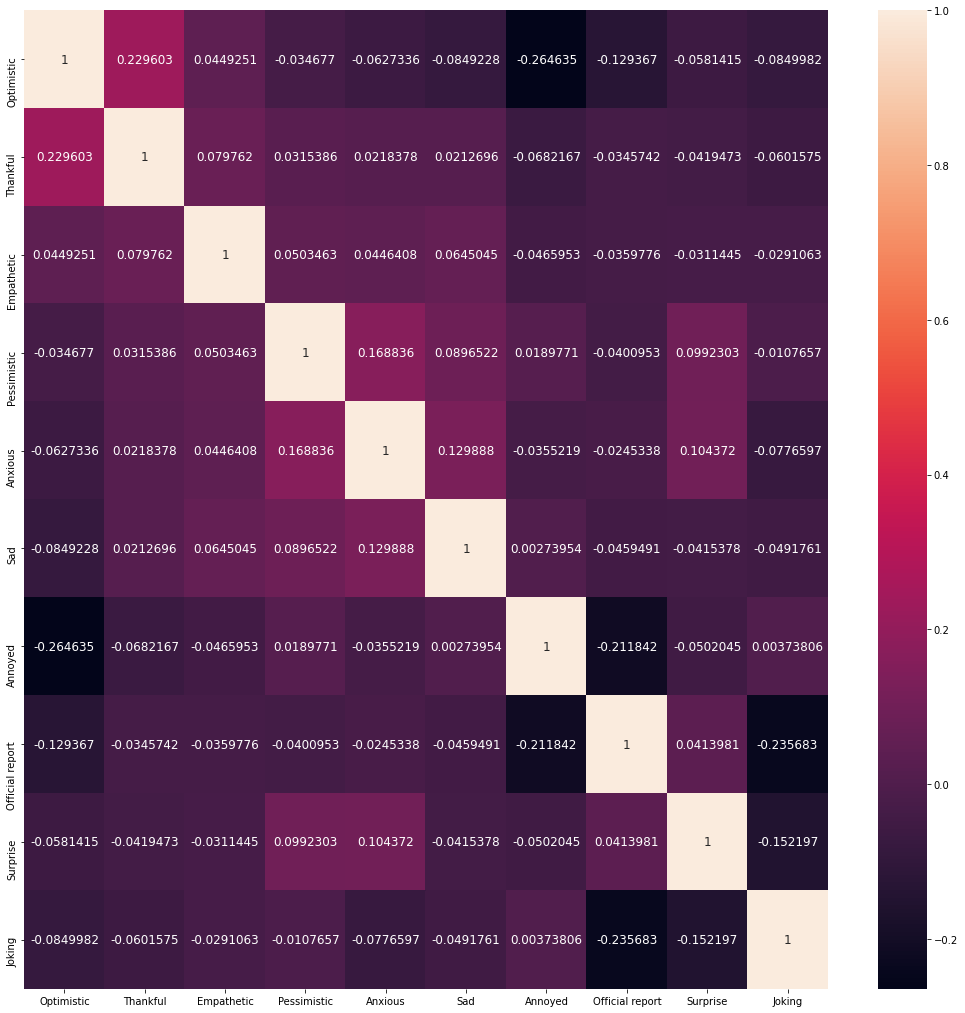

In [24]:
fig = plt.figure(figsize = (18, 18))
sns.heatmap(only_emotes.corr(), annot = True, xticklabels = emotions, yticklabels = emotions, fmt = 'g', annot_kws = {"size" : 12})

In [25]:
emote_array = np.zeros((10, 10))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Official report' : 7,
    'Surprise' : 8, 'Joking' : 9
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

In [26]:
emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
emote_df

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking
0,34437,3933,1046,224,447,413,827,2374,3947,6951
1,3933,5339,403,174,284,347,407,474,400,709
2,1046,403,2806,156,253,382,234,169,203,498
3,224,174,156,2003,579,394,577,61,909,459
4,447,284,253,579,4826,893,684,506,1711,403
5,413,347,382,394,893,6245,1416,465,510,1040
6,827,407,234,577,684,1416,32221,311,3812,8787
7,2374,474,169,61,506,465,311,22193,4154,511
8,3947,400,203,909,1711,510,3812,4154,22142,2439
9,6951,709,498,459,403,1040,8787,511,2439,39241


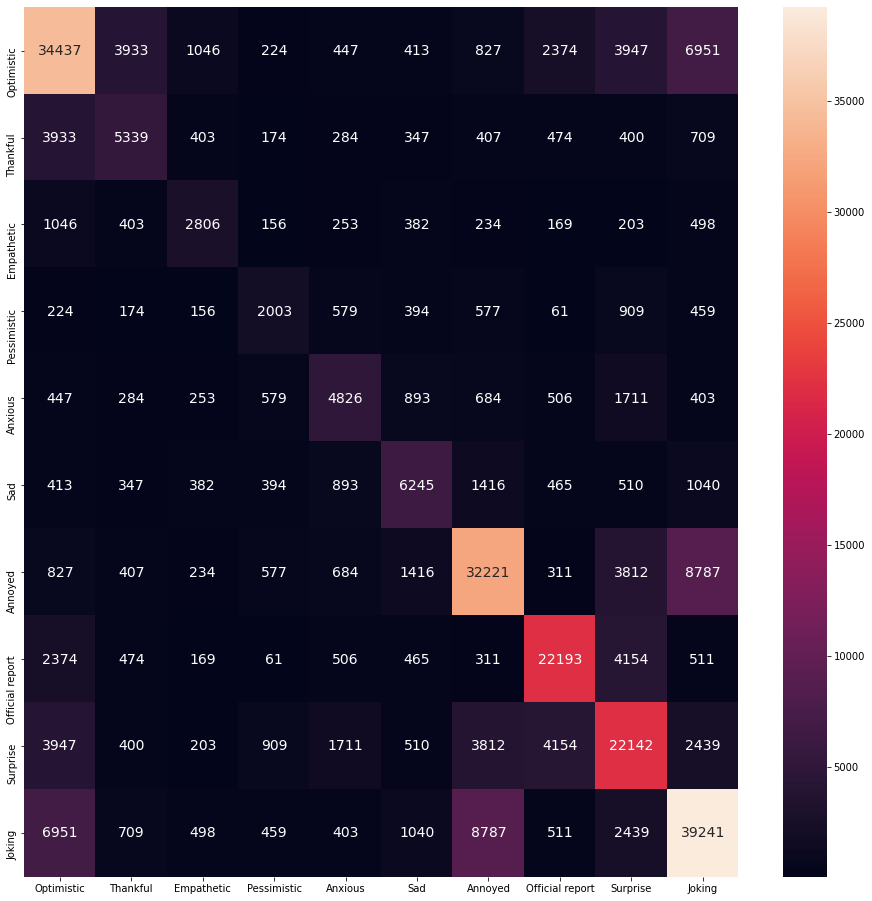

In [27]:
fig = plt.figure(figsize = (16,16))
sns.heatmap(emote_df, annot = True, xticklabels = emote_df.columns, yticklabels = emote_df.columns, fmt = 'g', annot_kws = {"size" : 14})

**Calculating number of tweets having each emotion**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


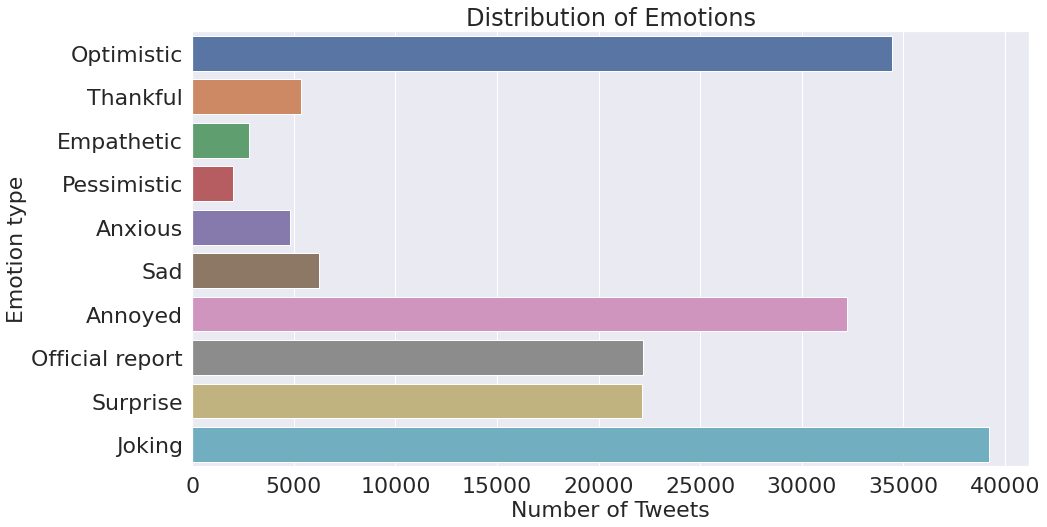

In [28]:
categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
plt.title("Distribution of Emotions", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

Question? To keep denial or not?
Decided not to keep

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


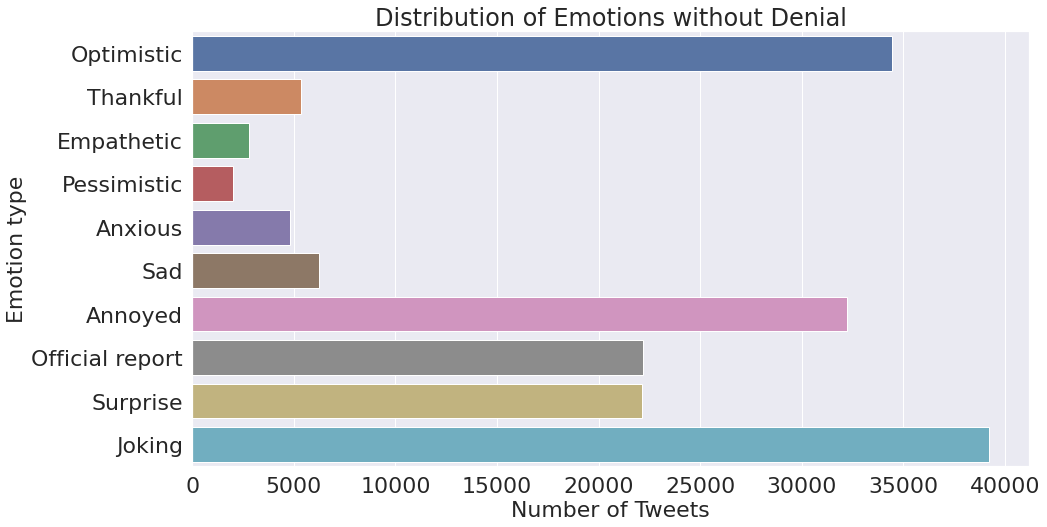

In [30]:
categories = list(data.columns[4:].values)
sns.set(font_scale = 2)

plt.figure(figsize = (15, 8))
ax= sns.barplot(data.iloc[:, 4:].sum().values, categories, orient = 'h')
plt.title("Distribution of Emotions without Denial", fontsize = 24)
plt.xlabel('Number of Tweets', fontsize = 22)
plt.ylabel('Emotion type', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = data.iloc[:, 4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom', fontsize = 18)
plt.show()

**Calculating number of tweets having multiple labels**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


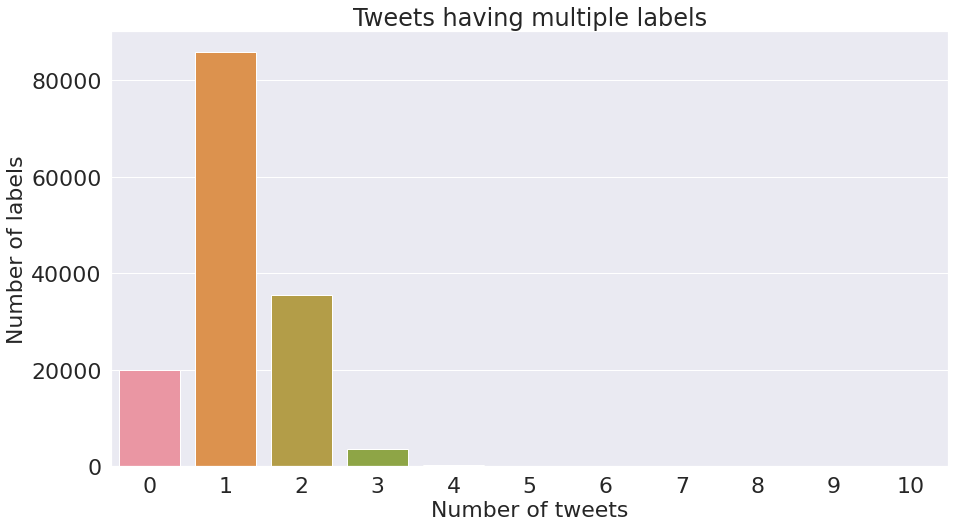

In [31]:
rowSums = data.iloc[:, 4:].sum(axis = 1)
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

plt.title("Tweets having multiple labels")
plt.xlabel('Number of tweets', fontsize = 22)
plt.ylabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Monthwise visualisation of emotions**

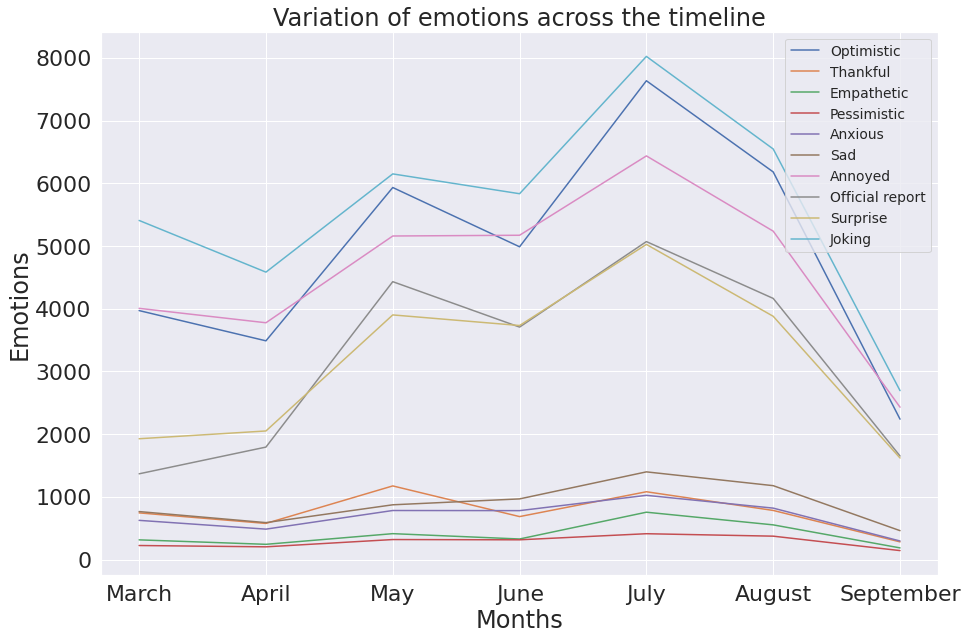

In [32]:
#x axis -> months
#y axis -> emotions
emotions = data.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [data[data['month'] == 'mar'][x].sum() for x in emotions]
april = [data[data['month'] == 'apr'][x].sum() for x in emotions]
may = [data[data['month'] == 'may'][x].sum() for x in emotions]
june = [data[data['month'] == 'jun'][x].sum() for x in emotions]
july = [data[data['month'] == 'jul'][x].sum() for x in emotions]
august = [data[data['month'] == 'aug'][x].sum() for x in emotions]
september = [data[data['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Emotions")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
plt.title("Variation of emotions across the timeline")
plt.show()

**Plots for Mumbai and Delhi**

In [33]:
mumbai = data[(data['place'] == "mumbai, india") | (data['place'] == 'mumbai') | (data['place'] == 'navi mumbai') | (data['place'] == 'navi mumbai, india')]
delhi = data[(data['place'] == "delhi, india") | (data['place'] == "new delhi, india") | (data['place'] == "delhi") | (data['place'] == 'new delhi')]

print(mumbai.shape, delhi.shape)

(18076, 14) (17593, 14)


pretty cool that we have approximately the same data points for both the cities

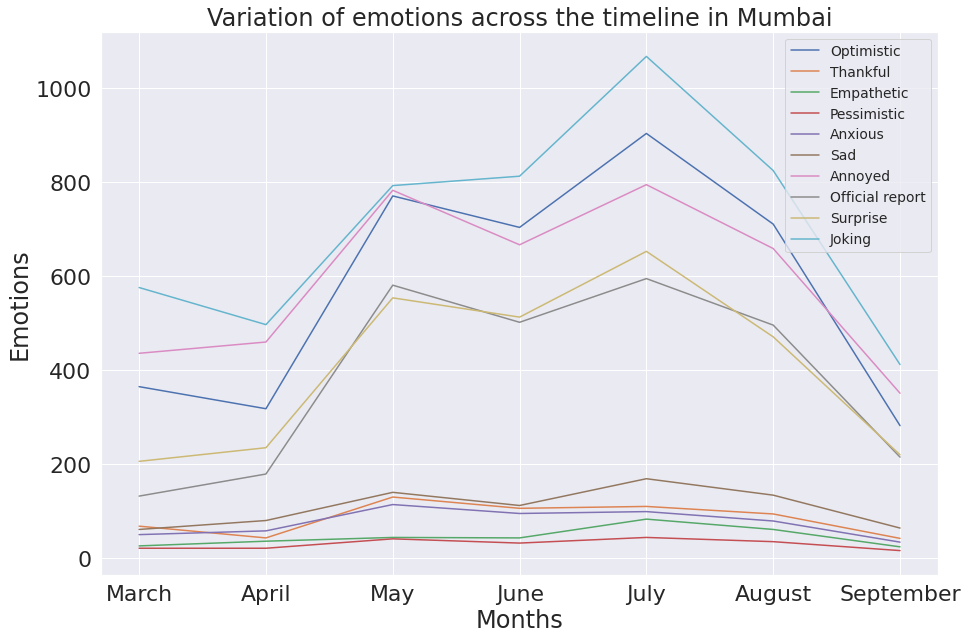

In [34]:
#x axis -> months
#y axis -> emotions
emotions = mumbai.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [mumbai[mumbai['month'] == 'mar'][x].sum() for x in emotions]
april = [mumbai[mumbai['month'] == 'apr'][x].sum() for x in emotions]
may = [mumbai[mumbai['month'] == 'may'][x].sum() for x in emotions]
june = [mumbai[mumbai['month'] == 'jun'][x].sum() for x in emotions]
july = [mumbai[mumbai['month'] == 'jul'][x].sum() for x in emotions]
august = [mumbai[mumbai['month'] == 'aug'][x].sum() for x in emotions]
september = [mumbai[mumbai['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Emotions")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
plt.title("Variation of emotions across the timeline in Mumbai")
plt.show()

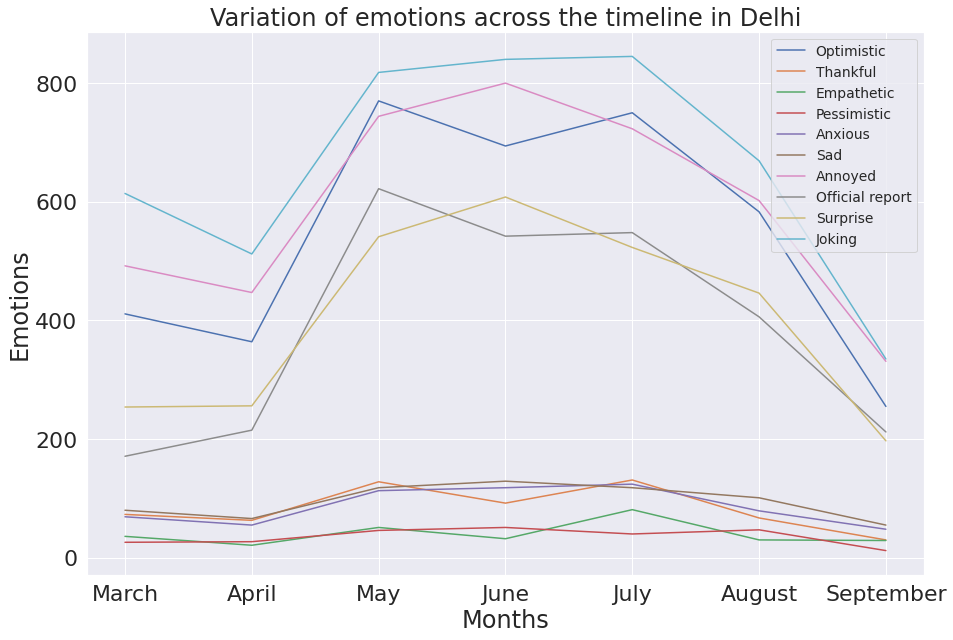

In [35]:
#x axis -> months
#y axis -> emotions
emotions = delhi.columns[4:]

input = []
months = ["March", "April", "May", "June", "July", "August", "September"]
march = [delhi[delhi['month'] == 'mar'][x].sum() for x in emotions]
april = [delhi[delhi['month'] == 'apr'][x].sum() for x in emotions]
may = [delhi[delhi['month'] == 'may'][x].sum() for x in emotions]
june = [delhi[delhi['month'] == 'jun'][x].sum() for x in emotions]
july = [delhi[delhi['month'] == 'jul'][x].sum() for x in emotions]
august = [delhi[delhi['month'] == 'aug'][x].sum() for x in emotions]
september = [delhi[delhi['month'] == 'sep'][x].sum() for x in emotions]

input.append(march)
input.append(april)
input.append(may)
input.append(june)
input.append(july)
input.append(august)
input.append(september)

plt.figure(figsize = (15, 10))
plt.plot(months, input)
plt.xlabel("Months")
plt.ylabel("Emotions")
plt.legend(emotions, loc = 1, fontsize = 'xx-small')
plt.title("Variation of emotions across the timeline in Delhi")
plt.show()

In [36]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                     data['Official report'] + data['Surprise'] + data['Joking']
data

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
0,meditation and mindfulness tips for coping wit...,0.125000,"pune, india",mar,0,0,0,0,1,0,0,0,0,0,1
1,contribute to india fights corona gandhinagar...,0.000000,"gandhinagar, india",mar,1,0,0,0,0,0,0,0,0,0,1
2,"sir, please send a team immediately to sa...",0.000000,"bidhan nagar, india",mar,1,0,0,0,0,0,0,0,0,0,1
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.033333,"maharashtra, india",mar,0,0,0,0,0,0,0,0,1,0,1
4,mata di doston ise #corona ke tarah faila do ...,0.600000,"bokaro steel city, india",mar,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145548,wow good to see these kids interest in onli...,0.350000,lb nagar,sep,0,0,0,0,0,0,0,0,0,1,1
145549,"83,812 new cases and 1054 deaths in last 24 ...",0.068182,"new delhi, india",sep,0,0,0,0,0,0,0,1,0,0,1
145550,unlocking the #lockdown - women’s rights &amp;...,-0.175000,"new delhi, india",sep,0,0,0,0,0,0,0,0,0,1,1
145551,astrazeneca covid-19 vaccine trial in us on ho...,0.000000,"new delhi, india",sep,0,0,0,0,0,0,0,1,1,0,2


**4 examples for 0,1,2 & 3 emotions**

In [41]:
four = zero_em.sample(n = 4)
four

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
4162,sir its may control but question how chaina n...,0.035714,"adra, india",mar,0,0,0,0,0,0,0,0,0,0,0
114808,you know in this lockdown period i started w...,0.200000,"rajendra nagar, india",aug,0,0,0,0,0,0,0,0,0,0,0
3562,corona virus played pubg with me.#pubg #covidi...,0.000000,sweet home,mar,0,0,0,0,0,0,0,0,0,0,0
14531,#covid knows no religion. but foreigners at th...,0.041667,"mookandapalli, india",mar,0,0,0,0,0,0,0,0,0,0,0


In [43]:
print(data['tweet'].iloc[4162], '\n')
print(data['tweet'].iloc[114808], '\n')
print(data['tweet'].iloc[3562], '\n')
print(data['tweet'].iloc[14531], '\n')

 sir its may control but question how chaina not a single vvip.nurce. doctor effected of corona even b…  

  you know in this lockdown period i started watching movies of #puneethrajkumar sir.…  

corona virus played pubg with me.#pubg #covididiots  

#covid knows no religion. but foreigners at this time of #corona scare knows every mosque in nook &amp; corner of count…  



**1 emotion**

In [44]:
one_em = data[data['n_emotions'] == 1]
four = one_em.sample(n = 4)
four

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
39455,#indiafightscorona➡️early detection of #covid1...,0.100000,"ranchi, india",may,0,0,0,0,0,0,1,0,0,0,1
128500,good work or just making of another bjp leader !,0.875000,"new delhi, india",aug,1,0,0,0,0,0,0,0,0,0,1
63298,1359 positive cases &amp; 22 deaths in delhi i...,0.023485,"new delhi, india",jun,0,0,0,0,0,0,0,1,0,0,1
18829,congress can list the methods of helping indi...,-0.300000,"haveli, india",apr,1,0,0,0,0,0,0,0,0,0,1


In [47]:
print(data['tweet'].iloc[39455], '\n', data[emotions].iloc[39455], '\n\n')
print(data['tweet'].iloc[128500], '\n', data[emotions].iloc[128500], '\n\n')
print(data['tweet'].iloc[63298], '\n', data[emotions].iloc[63298], '\n\n')
print(data['tweet'].iloc[18829], '\n', data[emotions].iloc[18829], '\n\n')

#indiafightscorona➡️early detection of #covid19 can help cure the disease. ➡️do not hesitate to come forward and…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            1
Official report    0
Surprise           0
Joking             0
Name: 39455, dtype: int64 


good work or just making of another bjp leader !  
 Optimistic         1
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            0
Official report    0
Surprise           0
Joking             0
Name: 128500, dtype: int64 


1359 positive cases &amp; 22 deaths in delhi in the last 24hrs.recovered-9,898 active case-14,456 650 deaths total c…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            0
Official report    1
Surprise           0
Joking             0
Name: 63298, dtype: i

**2 emotions**

In [48]:
two_em = data[data['n_emotions'] == 2]
four = two_em.sample(n = 4)
four

,tweet,sentiment_score,place,month,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Official report,Surprise,Joking,n_emotions
51669,"corona, irrfan khan, rishi kapoor++celebs, amp...",0.000000,"bengaluru, india",may,1,0,0,0,0,0,0,0,0,1,2
11212,hi mam my husband has lost the job before 2 m...,0.253571,"malumichampatti, india",mar,0,0,0,0,0,0,1,0,0,1,2
47465,"rolls-royce, the british maker of plane engine...",-0.150000,"mumbai, india",may,0,0,0,0,0,0,0,0,1,1,2
103270,last updated no of corona cases 1287945not 13...,0.000000,"shahjahanpur, india",jul,0,0,0,0,0,0,0,1,1,0,2


In [49]:
print(data['tweet'].iloc[51669], '\n', data[emotions].iloc[51669], '\n\n')
print(data['tweet'].iloc[11212], '\n', data[emotions].iloc[11212], '\n\n')
print(data['tweet'].iloc[47465], '\n', data[emotions].iloc[47465], '\n\n')
print(data['tweet'].iloc[103270], '\n', data[emotions].iloc[103270], '\n\n')

corona, irrfan khan, rishi kapoor++celebs, amphan, pia... i hope it ends here. i don't want the list to grow in the…  
 Optimistic         1
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            0
Official report    0
Surprise           0
Joking             1
Name: 51669, dtype: int64 


 hi mam my husband has lost the job before 2 months right now we don't have any support due to coro…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            1
Official report    0
Surprise           0
Joking             1
Name: 11212, dtype: int64 


rolls-royce, the british maker of plane engines, says it will cut at least 9,000 jobs and slash costs elsewhere, as…  
 Optimistic         0
Thankful           0
Empathetic         0
Pessimistic        0
Anxious            0
Sad                0
Annoyed            0
Official report    0
Surprise  